# Phase-field crystal tutorail: Polycrystalline materials

In this tutorial, we will look at different ways of creating polycrystalline materials with the PFC framework.

In [1]:
# !pip install comfit -q
import sys
from pathlib import Path
current_dir = Path().resolve()
parent_dir = current_dir.parent
sys.path.append(str(parent_dir))
import comfit as cf


The first way to create a polycrystalline material is to quench the PFC. 

In [2]:
# import comfit as cf
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


276


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x/a₀', ylabel='y/a₀'>)

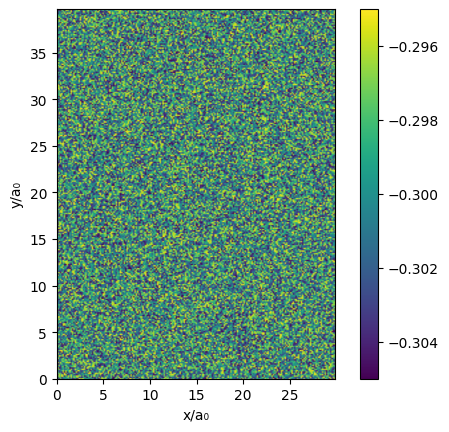

In [3]:
pfc = cf.PhaseFieldCrystal2DTriangular(30, 23)

#Set a random initial condition
pfc.psi = 0.01*(np.random.rand(pfc.xRes,pfc.yRes) - 0.5) + pfc.psi0
pfc.psi_f = sp.fft.fftn(pfc.psi)

pfc.plot_field(pfc.psi)

Evolving the PFC: 100%|██████████| 3000/3000 [00:31<00:00, 95.04it/s] 

276


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x/a₀', ylabel='y/a₀'>)

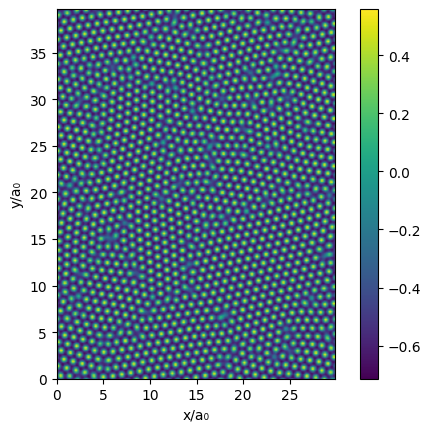

In [4]:
pfc.evolve_PFC(3000)
pfc.plot_field(pfc.psi)

Increasing the size of the simulation will create a larger polycrystalline material.

However, in many situations we want to control the polycrystalline material. 
In this case, we want to prescribe the regions with the different lattice orientations. 
Let's see how that can be done

We start by creating a simple inclusion, which is rotated with respect to the rest of the material.
To easily see what is going on, we will use the square PFC model.

280


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x/a₀', ylabel='y/a₀'>)

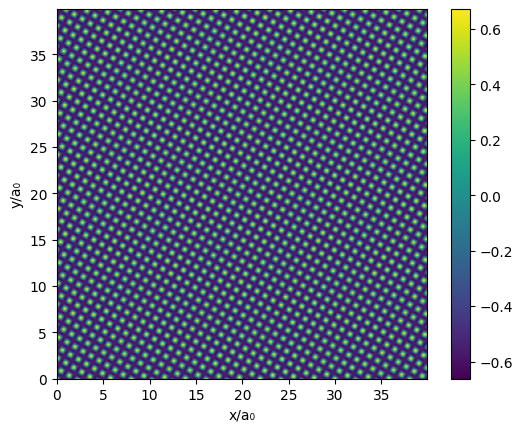

In [5]:
pfc = cf.PhaseFieldCrystal2DSquare(40, 40)

# This creates a standard orientation of the crystal
pfc.conf_PFC_from_amplitudes()


psi_rotated = pfc.calc_PFC_from_amplitudes(rotation=np.pi/3)
pfc.plot_field(psi_rotated)


Now we just need to paste this region in the center onto the old field contained in the variable `pfc.psi`.

280


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x/a₀', ylabel='y/a₀'>)

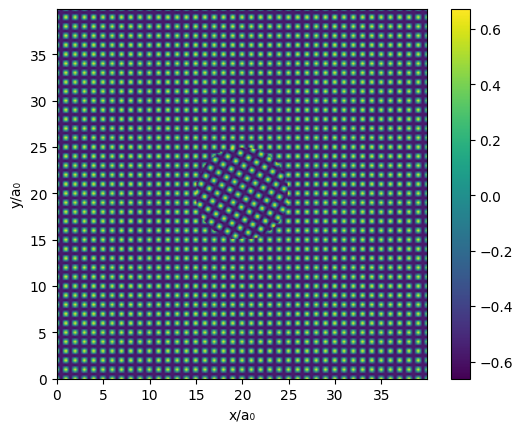

In [6]:
# Specify the region centered at the mid position with radius 5 a0.
inclusion_region = pfc.calc_region_disk(pfc.rmid, 5*pfc.a0)

# Set the rotated field in the inclusion region
pfc.psi[inclusion_region] = psi_rotated[inclusion_region]
pfc.psi_f = sp.fft.fftn(pfc.psi)

pfc.plot_field(pfc.psi)

The interface is very sharp. In order to smooth it, we simply evolve the field for a few time steps.

NB! Remember that in order for this method to work, we need to also specify the fourier transform of the field, which is why we have added the `pfc.psi_f = sp.fft.fftn(pfc.psi)` line above. 

Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 90.57it/s]

280


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x/a₀', ylabel='y/a₀'>)

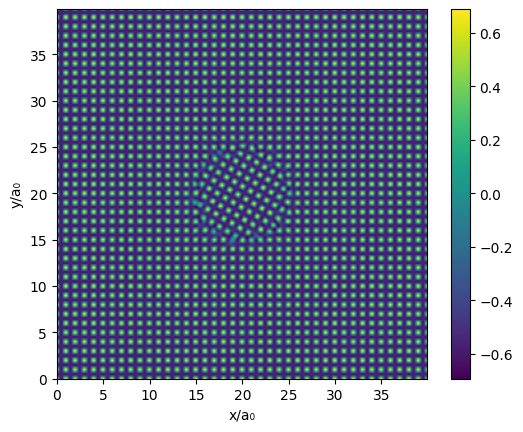

In [7]:
pfc.evolve_PFC(100)

pfc.plot_field(pfc.psi)

Let create a bigger inclusion and create an evolution gif. 

Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 89.44it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 83.17it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 91.79it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 79.18it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 67.34it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 71.58it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 83.09it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 84.87it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 81.85it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 68.20it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 83.71it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 83.25it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 87.27it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 98.02it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 83.87it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 79.09it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 85.29it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 81.50it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 87.83it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.72it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 84.23it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 83.52it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.05it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 90.02it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 88.79it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 90.74it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 87.25it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 82.64it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 78.66it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 90.98it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 69.93it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 71.04it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 82.90it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 72.14it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 79.29it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 91.60it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 97.93it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 96.43it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 91.38it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 94.33it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 99.49it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 96.46it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 95.89it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 87.73it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 80.00it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.53it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 93.73it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 93.61it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 96.62it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 84.80it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 85.24it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.33it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 93.47it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 94.71it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 94.11it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 89.85it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 93.89it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 90.75it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 95.06it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 85.24it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 89.76it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 87.65it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.84it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 93.75it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.66it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 86.29it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 94.32it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 94.29it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 71.71it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 91.98it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 94.45it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 68.19it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 90.72it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 93.07it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 87.53it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 71.95it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 91.71it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 94.63it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 86.50it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 81.92it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.23it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.58it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 95.93it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 90.40it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 86.50it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.37it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.27it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 93.57it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 89.61it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 97.82it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 95.00it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 95.04it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 92.77it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 95.06it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 93.26it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 96.36it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 97.66it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:00<00:00, 104.95it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 88.42it/s]


280


Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 93.71it/s]


280


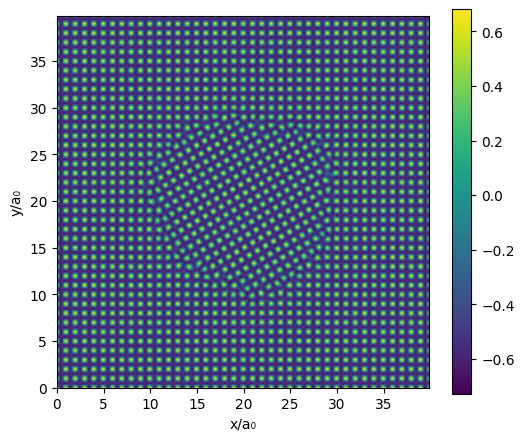

In [8]:
pfc = cf.PhaseFieldCrystal2DSquare(40, 40)

# This creates a standard orientation of the crystal
pfc.conf_PFC_from_amplitudes()

# Create the rotated field
psi_rotated = pfc.calc_PFC_from_amplitudes(rotation=np.pi/6)

# Specify the region centered at the mid position with radius 5 a0.
inclusion_region = pfc.calc_region_disk(pfc.rmid, 10*pfc.a0)

# Set the rotated field in the inclusion region
pfc.psi[inclusion_region] = psi_rotated[inclusion_region]
pfc.psi_f = sp.fft.fftn(pfc.psi)

for n in range(100):
    pfc.evolve_PFC(100)
    pfc.plot_field(pfc.psi)
    cf.tool_save_plot(n)
cf.tool_make_animation_gif(n,'Inclusion_PFC_normal')

Now, the standard PFC evolution does not make the inclusion shrink by any meaningful amount. 
In order to see some more pronounced evolution, we will look at the same simulation, but now evolving according to the sHPFC model.
The sHPFC model will initiate a velocity field with the PFC that are saved in the components `psi[1]` and `psi[2]`, while the PFC field itself will be saved in `psi[0]`, which needs to be taken into account when plotting the field. 
Also, it is important to smooth the interface by evolving the field according to normal PFC dynamics for a few time steps before starting the sHPFC evolution. 
This is done in the following script


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:15<00:00,  6.48it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:12<00:00,  7.90it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.74it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.66it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.39it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.55it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.62it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:12<00:00,  8.09it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:12<00:00,  8.13it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:12<00:00,  8.22it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.15it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.83it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.98it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.25it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.32it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.93it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.96it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  9.07it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.23it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:13<00:00,  7.69it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.88it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.58it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.71it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.70it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.65it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:12<00:00,  8.28it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.40it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.97it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.88it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.84it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.88it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:12<00:00,  8.19it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.72it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.90it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.70it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.60it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.71it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.66it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.48it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.68it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.79it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:09<00:00, 10.02it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:12<00:00,  8.01it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.78it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  9.05it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.64it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.42it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.22it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.42it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.83it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.99it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.69it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.27it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.29it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.43it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.73it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.67it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.77it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  9.00it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.18it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  9.06it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.12it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.88it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.97it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  9.09it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.83it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.13it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.76it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.96it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.77it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.80it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.75it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:12<00:00,  8.18it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.47it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:12<00:00,  8.04it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:12<00:00,  8.06it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.63it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.78it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.39it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.81it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  9.06it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.22it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.42it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  8.50it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.26it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.38it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.40it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.70it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:11<00:00,  9.08it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.28it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.58it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.52it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.39it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.62it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.43it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.57it/s]


280


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:10<00:00,  9.64it/s]


280


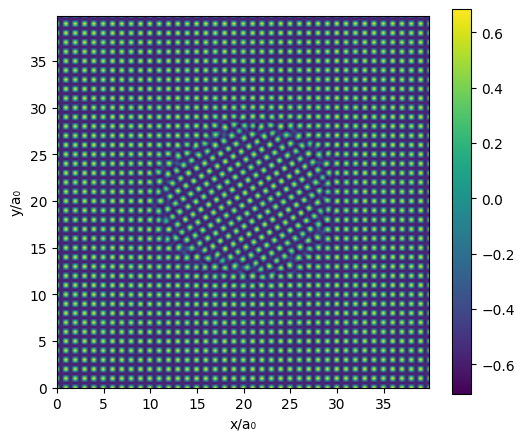

In [10]:
pfc = cf.PhaseFieldCrystal2DSquare(40, 40)

# This creates a standard orientation of the crystal
pfc.conf_PFC_from_amplitudes()

# Create the rotated field
psi_rotated = pfc.calc_PFC_from_amplitudes(rotation=np.pi/6)

# Specify the region centered at the mid position with radius 5 a0.
inclusion_region = pfc.calc_region_disk(pfc.rmid, 10*pfc.a0)

# Set the rotated field in the inclusion region
pfc.psi[inclusion_region] = psi_rotated[inclusion_region]
pfc.psi_f = sp.fft.fftn(pfc.psi)

# Smooth the interface
pfc.evolve_PFC(100)

for n in range(100):
    pfc.evolve_PFC_hydrodynamic(100, rho0=2**-6, gamma_S=2**-6)
    pfc.plot_field(pfc.psi[0])
    cf.tool_save_plot(n)
cf.tool_make_animation_gif(n,'Inclusion_PFC_sHPFC')

As we see, the presence of the velocity field makes the inclusion shrink faster. 

The inclusion is one of the types of preconfigured polycrystalline materials that can be created with the PFC framework.
Another type is the four-grain configuration used in the paper [Hydrodynamic phase field crystal approach to interfaces, dislocations and multi-grain networks](http://iopscience.iop.org/article/10.1088/1361-651X/ac9493).
Both of these configurations are available through the `conf_create_polycrystal` method in the pfc class. 
In this method, `relaxation_time` is an optional keyword specifying for how long a simulation time the initial polycrystalline edges are evolved according to classical PFC dynamics to smooth them before running. 
More information on these methods can be found in the documentation.

Evolving the PFC: 100%|██████████| 100/100 [00:01<00:00, 95.93it/s]

210


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x/a₀', ylabel='y/a₀'>)

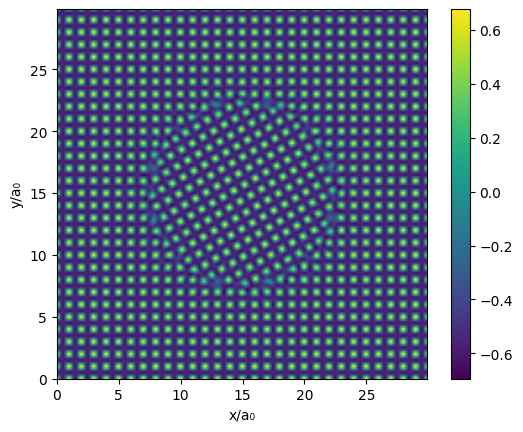

In [11]:
pfc = cf.PhaseFieldCrystal2DSquare(30,30)

# This creates a standard orientation of the crystal
pfc.conf_create_polycrystal(type='circular', relaxation_time=10)
pfc.plot_field(pfc.psi)

Evolving the PFC: 100%|██████████| 100/100 [00:00<00:00, 158.33it/s]

210


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x/a₀', ylabel='y/a₀'>)

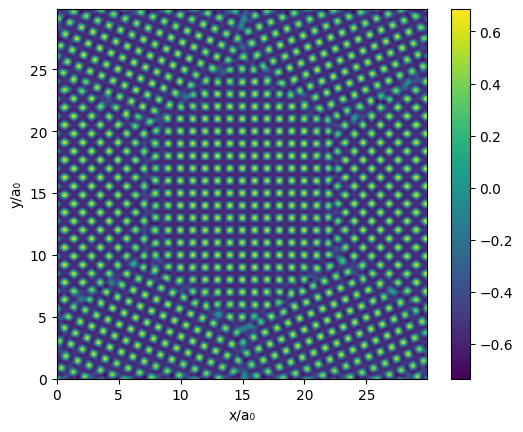

In [12]:
pfc = cf.PhaseFieldCrystal2DSquare(30,30)

# This creates a standard orientation of the crystal
pfc.conf_create_polycrystal(type='four_grain', relaxation_time=10)
pfc.plot_field(pfc.psi)
